# Project-12 Flight Price Prediction

In [1]:
## importing esential libraries :
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## load the train and test data :
train=pd.read_excel('Data_Train.xlsx')
test=pd.read_excel('Test_set.xlsx')

In [3]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [5]:
## here we will concat the train and test dataset :
data=pd.concat([train,test],ignore_index=True)

In [6]:
## lets check the first five records of the dataset :
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [7]:
## check the rows and columns of the data :
data.shape

(13354, 11)

In [8]:
## total information of the dataset :
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


In [9]:
data['Duration'].value_counts()

2h 50m     672
1h 30m     493
2h 45m     432
2h 55m     418
2h 35m     399
          ... 
3h 25m       1
35h 20m      1
42h 45m      1
31h 10m      1
37h 10m      1
Name: Duration, Length: 374, dtype: int64

In [10]:
## lets check the null values :
data.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [11]:
data.dropna(inplace=True)

In [12]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [13]:
data['Journey_day']=pd.to_datetime(data.Date_of_Journey, format='%d/%m/%Y').dt.day

In [14]:
data['Journey_month']=pd.to_datetime(data['Date_of_Journey'], format='%d/%m/%Y').dt.month

In [15]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3


In [16]:
data.drop('Date_of_Journey',axis=1,inplace=True)

In [17]:
data['Dep_hour']=pd.to_datetime(data['Dep_Time']).dt.hour

In [18]:
data['Dep_min']=pd.to_datetime(data['Dep_Time']).dt.minute

In [19]:
data.drop('Dep_Time',axis=1,inplace=True)

In [20]:
data.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662.0,1,5,5,50


In [21]:
data['Arrival_hour']=pd.to_datetime(data['Arrival_Time']).dt.hour
data['Arrival_min']=pd.to_datetime(data['Arrival_Time']).dt.minute

In [22]:
data.drop('Arrival_Time',axis=1,inplace=True)

In [23]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,5,50,13,15


In [24]:
duration=list(data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i]=duration[i].strip()+' 0m'
        else:
            duration[i]='0h '+duration[i]
            
duration_hours=[]
duration_min=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep='h')[0]))
    duration_min.append(int(duration[i].split(sep='m')[0].split()[-1]))    

In [25]:
data['Duration_hours']=duration_hours
data['Duration_mins']=duration_min

In [26]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,5,50,13,15,7,25


In [27]:
data.drop('Duration',axis=1,inplace=True)

In [28]:
data.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897.0,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662.0,1,5,5,50,13,15,7,25


In [29]:
data.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897.0,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662.0,1,5,5,50,13,15,7,25


In [30]:
data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [31]:
Airline=data['Airline']
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [32]:
data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [33]:
Source=data['Source']
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [34]:
data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [35]:
Destination=data[['Destination']]
Destination=pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [36]:
data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [37]:
data.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [38]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897.0,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662.0,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882.0,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218.0,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302.0,1,3,16,50,21,35,4,45


In [39]:
data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [40]:
data.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [41]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897.0,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662.0,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882.0,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218.0,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302.0,1,3,16,50,21,35,4,45


In [42]:
data.shape

(10682, 13)

In [43]:
data_train=pd.concat([data,Airline,Source,Destination],axis=1)

In [44]:
data_train.shape

(10682, 33)

In [45]:
data_train.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [46]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897.0,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662.0,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882.0,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218.0,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302.0,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [47]:
data_train.shape

(10682, 30)

In [48]:
data_train.skew()

Total_Stops                            0.317109
Price                                  1.812405
Journey_day                            0.118174
Journey_month                         -0.387409
Dep_hour                               0.112924
Dep_min                                0.167234
Arrival_hour                          -0.370146
Arrival_min                            0.110945
Duration_hours                         0.851197
Duration_mins                         -0.090680
Air India                              1.815902
GoAir                                  7.217685
IndiGo                                 1.562601
Jet Airways                            0.581943
Jet Airways Business                  42.164359
Multiple carriers                      2.461548
Multiple carriers Premium economy     28.616840
SpiceJet                               3.185036
Trujet                               103.353761
Vistara                                4.399205
Vistara Premium economy               59

In [49]:
## lets treat the skewness in the input dataset :
import numpy as np
for index in data.skew().index:
    if data.skew().loc[index]>0.5:
        data[index]=np.log1p(data[index])
    if data.skew().loc[index]<-0.5:
        data[index]=np.square(data[index])

In [50]:
data_train.skew()

Total_Stops                            0.317109
Price                                  1.812405
Journey_day                            0.118174
Journey_month                         -0.387409
Dep_hour                               0.112924
Dep_min                                0.167234
Arrival_hour                          -0.370146
Arrival_min                            0.110945
Duration_hours                         0.851197
Duration_mins                         -0.090680
Air India                              1.815902
GoAir                                  7.217685
IndiGo                                 1.562601
Jet Airways                            0.581943
Jet Airways Business                  42.164359
Multiple carriers                      2.461548
Multiple carriers Premium economy     28.616840
SpiceJet                               3.185036
Trujet                               103.353761
Vistara                                4.399205
Vistara Premium economy               59

In [51]:
dfr=data_train.corr()
dfr

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
Total_Stops,1.000000,0.603897,-0.009451,0.054383,-0.061476,-0.002618,0.038140,-0.106940,0.739916,-0.136706,...,-0.020459,-0.234758,0.490170,0.032761,-0.260752,0.490170,-0.447390,-0.260752,-0.234758,-0.015302
Price,0.603897,1.000000,-0.153774,-0.103643,0.006799,-0.024458,0.024244,-0.086155,0.508778,-0.124855,...,-0.000454,-0.179223,0.270676,0.009358,-0.230755,0.270676,-0.313417,-0.230755,-0.179223,0.189777
Journey_day,-0.009451,-0.153774,1.000000,-0.038359,0.002170,-0.008170,-0.003245,-0.017510,-0.022059,-0.008940,...,-0.020115,0.006611,0.100088,-0.060558,-0.014030,0.100088,0.002632,-0.014030,0.006611,-0.075254
Journey_month,0.054383,-0.103643,-0.038359,1.000000,0.039127,-0.059267,-0.003927,-0.100626,0.016141,-0.040897,...,-0.019797,0.005650,0.139222,0.087177,-0.039352,0.139222,0.090490,-0.039352,0.005650,-0.453685
Dep_hour,-0.061476,0.006799,0.002170,0.039127,1.000000,-0.024745,0.005180,0.067911,0.002869,-0.023707,...,-0.003375,-0.014846,-0.118780,0.155471,-0.017292,-0.118780,0.009469,-0.017292,-0.014846,-0.022138
Dep_min,-0.002618,-0.024458,-0.008170,-0.059267,-0.024745,1.000000,0.043122,-0.017597,-0.022104,0.092485,...,-0.011380,0.067110,-0.085534,-0.024238,0.037705,-0.085534,0.003200,0.037705,0.067110,0.107129
Arrival_hour,0.038140,0.024244,-0.003245,-0.003927,0.005180,0.043122,1.000000,-0.154363,0.055276,-0.118309,...,0.000776,-0.014795,-0.006790,0.054693,-0.033512,-0.006790,-0.030867,-0.033512,-0.014795,0.000366
Arrival_min,-0.106940,-0.086155,-0.017510,-0.100626,0.067911,-0.017597,-0.154363,1.000000,-0.074450,0.151628,...,0.000314,-0.030493,-0.209882,0.118573,0.081196,-0.209882,0.095250,0.081196,-0.030493,0.021271
Duration_hours,0.739916,0.508778,-0.022059,0.016141,0.002869,-0.022104,0.055276,-0.074450,1.000000,-0.126468,...,-0.016268,-0.186668,0.299819,0.123524,-0.233326,0.299819,-0.346192,-0.233326,-0.186668,0.004052
Duration_mins,-0.136706,-0.124855,-0.008940,-0.040897,-0.023707,0.092485,-0.118309,0.151628,-0.126468,1.000000,...,0.004952,-0.098823,-0.154126,0.013761,-0.018761,-0.154126,0.218207,-0.018761,-0.098823,0.079866


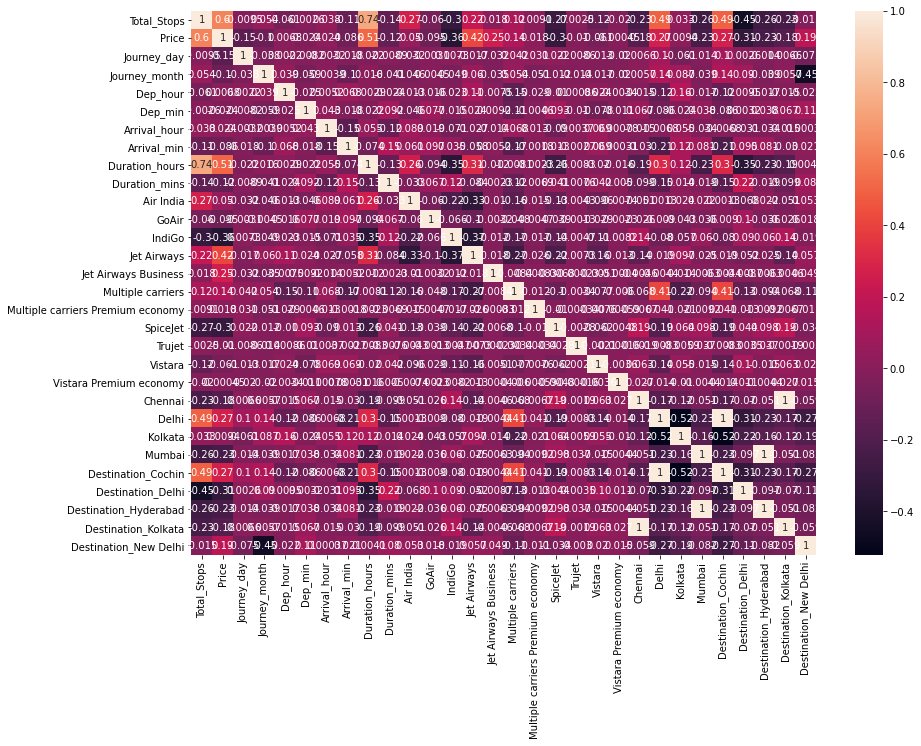

In [52]:
plt.figure(figsize=(14,10))
sns.heatmap(dfr,annot=True)
plt.show()

In [53]:
## splitting the data into input and output :
X=data_train.drop('Price',axis=1)
y=data_train['Price']

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [55]:
## importing the standard scaler:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [56]:
## importing esential libraries :
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score

In [57]:
## here we will create the object :
LR=LinearRegression()
LA=Lasso()
RI=Ridge()
KNR=KNeighborsRegressor()
DTR=DecisionTreeRegressor(random_state=42)
ABR=AdaBoostRegressor(random_state=42)
RFR=RandomForestRegressor(random_state=42)
GBR=GradientBoostingRegressor(random_state=42)

In [58]:
models=[]
models.append(('LinearRegression',LR))
models.append(('Lasso',LA))
models.append(('Ridge',RI))
models.append(('DecisionTreeRegressor',DTR))
models.append(('KNeighborsRegressor',KNR))
models.append(('AdaBoostRegressor',ABR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))

In [59]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
for name,model in models:
    print('>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>',name,'<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<')
    print('\n',model)
    Model.append(name)
    model.fit(X_train,y_train)
    predm=model.predict(X_test)
    r2=r2_score(y_test,predm)
    print('R2_score = ',r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,predm)
    print("Mean_Squared_Error =",mse)
    MSE.append(round(mse,3))
    score= cross_val_score(model,X,y,cv=10,scoring='r2').mean()
    print('Cross_Val_Score = ',score)
    cvs.append(score)
    print('\n')

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> LinearRegression <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

 LinearRegression()
R2_score =  0.61959437290701
Mean_Squared_Error = 8202327.557407134
Cross_Val_Score =  0.6195426980562843


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Lasso <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

 Lasso()
R2_score =  0.6190467615317858
Mean_Squared_Error = 8214135.1847234685
Cross_Val_Score =  0.6194273782852027


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Ridge <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

 Ridge()
R2_score =  0.6185357441757697
Mean_Squared_Error = 8225153.7697365135
Cross_Val_Score =  0.6185578974412466


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> DecisionTreeRegressor <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

 DecisionTreeRegressor(random_state=42)
R2_score =  0.7245034671592279
Mean_Squared_Error = 5940271.758224016
Cross_Val_Score =  0.7184264109916383


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> KNeighborsRegressor <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

 KNeighborsRegressor()
R2_score =  0.570669349010061
Mean_Squared_Error = 9257251

In [60]:
final= pd.DataFrame({'Model': Model, 'R2_score': R2_score ,'Mean_Squared_Error' :MSE,'Cross_val_score':cvs})
final

,Model,R2_score,Mean_Squared_Error,Cross_val_score
0,LinearRegression,0.619594,8.202328e+06,0.619543
1,Lasso,0.619047,8.214135e+06,0.619427
2,Ridge,0.618536,8.225154e+06,0.618558
3,DecisionTreeRegressor,0.724503,5.940272e+06,0.718426
4,KNeighborsRegressor,0.570669,9.257252e+06,0.596482
5,AdaBoostRegressor,0.519985,1.035010e+07,0.302891
6,RandomForestRegressor,0.797539,4.365479e+06,0.813191
7,GradientBoostingRegressor,0.785625,4.622373e+06,0.770269


In [61]:
## conclusion is Adaboostregressor is best.

In [62]:
import joblib
joblib.dump(ABR,'Flight.csv')

['Flight.csv']